<center>UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE</center>
<center>CENTRO DE TECNOLOGIA</center>
<center>DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO</center>
<center>DISCIPLINA DE PROCESSAMENTO DIGITAL DE SINAIS</center>

<b>ALUNO:</b>  Eric Calasans de Barros 

<b>MAT.:  </b>20170155390

<b>PROF.:  </b>Pedro Yochinori Gushiken

<center><h1><b>PROVA - 2ª UNIDADE</b></h1></center>

<h3>Questão 1:</h3>

<h3>a)</h3>

>Sejam os sinais $x_{a}(t) = sen(2 \pi f_{1} t) + sen(2 \pi f_{2} t) + sen(2 \pi f_{3} t)$ e $x_{2}$ tal que:
* $3 sen(2 \pi f_{1} t)$, se $0 \leq t < 1$
* $3 sen(2 \pi f_{2} t)$, se $1 \leq t < 2$
* $3 sen(2 \pi f_{3} t)$, se $2 \leq t < \infty$

>Conforme instruções dadas no escopo da prova, os valores de $f_{1}, f_{2}$ e $f_{3}$ são, respectivamente, para $a = 5, b = 3$ e $c = 9$:

$$f_{1} = a = 5Hz$$

$$f_{2} = 10a + b = 10.5 + 3 = 53Hz$$

$$f_{3} = 100a + 10b + c = 100.5 + 10.3 + 9 = 539Hz$$

>Assim, temos que os seguintes sinais:
$$x_{a}(t) = sen(2 \pi .5 t) + sen(2 \pi .53 t) + sen(2 \pi .539 t) = sen(10 \pi t) + sen(106 \pi t) + sen(1078 \pi t)$$

>E:
>>>* $3 sen(10 \pi t)$, se $0 \leq t < 1$
>>>* $3 sen(106 \pi t)$, se $1 \leq t < 2$
>>>* $3 sen(1078 \pi t)$, se $2 \leq t < \infty$

>Ainda, segundo dados da prova, ambos os sinais foram amostrados a uma frequência de <b>10.000Hz</b> durante <b>3s</b>.  Dessa forma, cada amostra foi obtida a cada <b>$10^{-4}$s</b> e, em tempo discreto, obtemos $x_{1}[n]$:

$$x_{1}[n] = sen(10 \pi n) + sen(106 \pi n) + sen(1078 \pi n)$$ 

> e $x_{2}[n]:$

>>>* $3 sen(10 \pi t)$, se $0 \leq n < 10000 $
>>>* $3 sen(106 \pi t)$, se $10000 \leq n < 20000$
>>>* $3 sen(1078 \pi t)$, se $20000 \leq n < 30000$

>Utilizando a linguagem Python e suas bibliotecas, produzimos as sequências $x_{1}[n]$ e $x_{2}[n]$ conforme demonstrado a seguir:

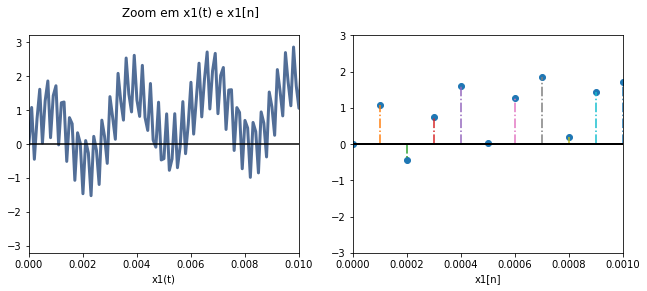

In [2]:
import numpy as np
from ThinkDSP import thinkdsp
from ThinkDSP import thinkplot # Bibliotecas para PDS(https://github.com/AllenDowney/ThinkDSP)
import scipy
import math
import matplotlib.pyplot as plt

%matplotlib inline

DOIS_PI = 2 * math.pi
FREQ_AMOSTRAGEM = 10000 # Em Hz
PERIODO_AMOSTRAGEM = 1/FREQ_AMOSTRAGEM

# Frequências calculadas conforme a matrícula
freq1 = 5 * DOIS_PI
freq2  = 53 * DOIS_PI
freq3 = 539 * DOIS_PI

# Senóides 
x11_t = thinkdsp.SinSignal(freq1)
x12_t = thinkdsp.SinSignal(freq2)
x13_t = thinkdsp.SinSignal(freq3)

# Sequências x1_n e x2_n
x1_t = x11_t + x12_t + x13_t

x1_n = x1_t.make_wave(duration=0.1, start=0, framerate=FREQ_AMOSTRAGEM)

x21_t = thinkdsp.SinSignal(freq1, amp=3)
x22_t = thinkdsp.SinSignal(freq2, amp=3)
x23_t = thinkdsp.SinSignal(freq3, amp=3)

w21_n = x21_t.make_wave(duration=1, start=0, framerate=FREQ_AMOSTRAGEM) 
w22_n = x22_t.make_wave(duration=1, start=1, framerate=FREQ_AMOSTRAGEM)
w23_n = x23_t.make_wave(duration=1, start=2, framerate=FREQ_AMOSTRAGEM)

x2_n = (w21_n + w22_n + w23_n)

# Gráficos
# x1_n
plt.subplot(1,2,1)
plt.suptitle('Zoom em x1(t) e x1[n]')
x1_n.plot()
plt.xlim(0,0.01)
plt.xlabel('x1(t)')
plt.axhline(y=0, color='k')

plt.subplot(1,2,2)
markerline, stemlines, baseline = plt.stem(x1_n.ts, x1_n.ys, '-.')
plt.setp(baseline, color='k', linewidth=2)
plt.xlim(0,0.001)
plt.ylim(-3,3)
plt.xlabel('x1[n]')
plt.subplots_adjust(right=1.5)
plt.show()

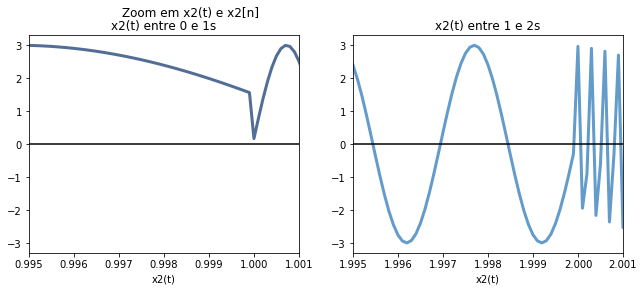

In [17]:
# x1_n
plt.subplot(1,2,1)
plt.suptitle('Zoom em x2(t) e x2[n]')
plt.title('x2(t) entre 0 e 1s')
x2_n.plot()
plt.xlim(0.995, 1.001)
plt.xlabel('x2(t)')
plt.axhline(y=0, color='k')

plt.subplot(1,2,2)
plt.title('x2(t) entre 1 e 2s')
x2_n.plot()
plt.xlim(1.995, 2.001)
plt.xlabel('x2(t)')
plt.axhline(y=0, color='k')
plt.subplots_adjust(right=1.5)

plt.show()

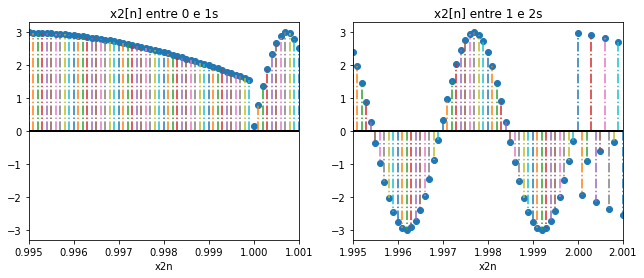

In [16]:
plt.subplot(1,2,1)
m, s, b = plt.stem(x2_n.ts, x2_n.ys, '-.')
plt.xlim(0.995, 1.001)
plt.setp(b, color='k', linewidth=2)
plt.xlabel('x2n')
plt.title('x2[n] entre 0 e 1s')
plt.axhline(y=0, color='k')

plt.subplot(1,2,2)
m, s, b = plt.stem(x2_n.ts, x2_n.ys, '-.')
plt.xlim(1.995, 2.001)
plt.setp(b, color='k', linewidth=2)
plt.xlabel('x2n')
plt.title('x2[n] entre 1 e 2s')
plt.axhline(y=0, color='k')
plt.subplots_adjust(right=1.5)
plt.show()

<h3>b)</h3>

>Sejam:

>>* $\Omega_{1} = 2 \pi f_{1} = 10 \pi$
>>* $\Omega_{2} = 2 \pi f_{2} = 106 \pi$
>>* $\Omega_{3} = 2 \pi f_{3} = 1078 \pi$

>Pela tabela de <b>DTFT</b> e considerando $\Omega$ <b>limitado em banda</b>, tal que $|\Omega| < \pi$:
$$X(\Omega) = \frac{\pi}{j} [\delta (\Omega - \Omega_{0}) - \delta (\Omega + \Omega_{0})]$$

>Utilizando a propriedade da **LINEARIDADE**(homogeneidade e superposição) da DTFT:
$$X_{1}(\Omega) = \frac{\pi}{j} \{[\delta (\Omega - \Omega_{1}) - \delta (\Omega + \Omega_{1})] + [\delta (\Omega - \Omega_{2}) - \delta (\Omega + \Omega_{2})] + [\delta (\Omega - \Omega_{3}) - \delta (\Omega + \Omega_{3})]\}$$
$$X_{1}(\Omega) = \frac{\pi}{j} \{[\delta (\Omega - 10 \pi) - \delta (\Omega + 10 \pi)] + [\delta (\Omega - 106 \pi) - \delta (\Omega + 106 \pi)] + [\delta (\Omega - 1078 \pi) - \delta (\Omega + 1078 \pi)]\}$$

>Para $X_{2}(\Omega)$:
>>>* $\frac{\pi}{j} [\delta (\Omega - 10 \pi) - \delta (\Omega + 10 \pi)]$, para $0 \leq n < 10.000$
>>>* $\frac{\pi}{j} [\delta (\Omega - 106 \pi) - \delta (\Omega + 106 \pi)]$, para $10.000 \leq n < 20.000$
>>>* $\frac{\pi}{j} [\delta (\Omega - 1078 \pi) - \delta (\Omega + 1078 \pi)]$, para $20.000 \leq n < 30.000$

<b>c)</b> O código abaixo mostra a utilização da biblioteca <b>numpy.fft</b> para o cálculo dos espectros de $x_{1}[n]$ e $x_{2}[n]$:


[0.00000000e+00 3.33344445e-01 6.66688890e-01 ... 9.99933331e+03
 9.99966666e+03 1.00000000e+04]


<function matplotlib.pyplot.show(*args, **kw)>

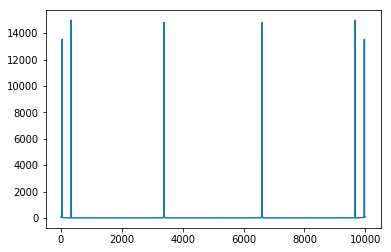

In [17]:
# Calcula o x1 para 3s
x1_n = x1_t.make_wave(duration=3, start=0, framerate=FREQ_AMOSTRAGEM)

x1FFT = np.fft.fft(x1_n.ys)

freq = np.linspace(0, 10000, len(x1FFT))
print(freq)

amplitude = np.abs(x1FFT)

plt.plot(freq, amplitude)
plt.show

 Pela definição da <i>Transformada Discreta de Fourier(DFT)</i>, temos que:
$$X[k] = X(k \Omega_{0}) = \sum_{n = 0}^{N - 1} x[n] e^{-jk \Omega_{0} n}$$

Considerando $N = 20$ pontos para a DFT, temos uma resolução de frequência $\Omega_{0}$ tal que:
$$\Omega_{0} = \frac{2 \pi}{N} = \frac{2 \pi}{20} = \frac{\pi}{10}$$

